# What is Clustering
Clustering is an unsupervised machine learning technique that groups similar data points into clusters based on their features. The goal is to ensure that points in the same cluster are more alike than those in different clusters. It's commonly used for pattern discovery and data segmentation.

We use clustering algorithms like:

K-Means Clustering

K-Medoids Clustering

Agglomerative Clustering (Single Linkage)

Agglomerative Clustering (Complete Linkage)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv(r"C:/Users/durgarao/OneDrive/Desktop/data science in machine learning/Instagram visits clustering.csv")
data=data.drop('User ID',axis=1)
data.head()

,Instagram visit score,Spending_rank(0 to 100)
0,63,24.050708
1,61,25.223290
2,104,18.528245
3,82,86.890232
4,14,31.492397


In [3]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

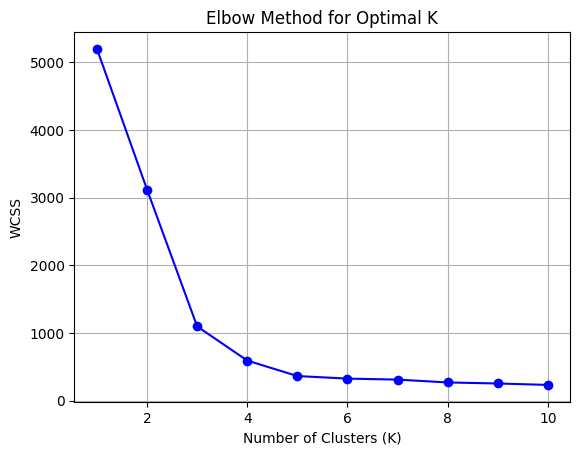

In [4]:
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss, 'bo-')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.grid()
plt.show()

The x-axis represents the number of clusters (K).

The y-axis represents the WCSS (Within-Cluster Sum of Squares), which measures how compact the clusters are.

As the number of clusters increases, the WCSS decreases—this is expected because more clusters mean data points are closer to their centroids.

The “elbow point” is the value of K where the rate of decrease in WCSS slows down significantly. This point represents a good balance between compact clusters and not overfitting.

From the graph, the elbow appears at K = 3 or 4, suggesting that using 3 or 4 clusters is optimal for your dataset.

This method helps you choose a suitable number of clusters before applying K-Means.

# 📈Use of the Elbow method
The Elbow Method is a popular technique used to determine the optimal number of clusters (K) in K-Means clustering. Its main purpose is to identify the value of K at which adding more clusters provides diminishing returns in terms of improved compactness of clusters.

The method works by plotting the Within-Cluster Sum of Squares (WCSS) against different values of K. WCSS measures the total distance between each data point and the centroid of its assigned cluster. As K increases, WCSS decreases because points are grouped into smaller, tighter clusters.

The “elbow point” on the graph is where the curve starts to bend or flatten, indicating that adding more clusters beyond this point does not significantly improve the model. This point is considered the most appropriate number of clusters for the dataset, balancing model accuracy and simplicity.

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

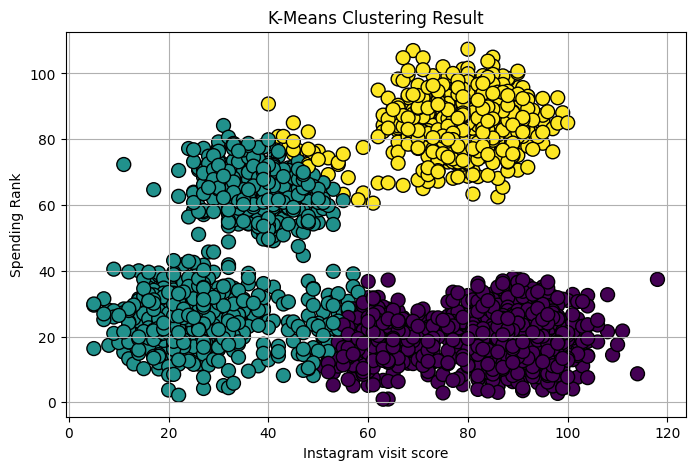

   Instagram visit score  Spending_rank(0 to 100)  Cluster
0                     63                24.050708        0
1                     61                25.223290        0
2                    104                18.528245        0
3                     82                86.890232        2
4                     14                31.492397        1


In [6]:
plt.figure(figsize=(8, 5))
plt.scatter(data['Instagram visit score'], data['Spending_rank(0 to 100)'],
            c=data['Cluster'], cmap='viridis', s=100, edgecolor='k')
plt.title("K-Means Clustering Result")
plt.xlabel("Instagram visit score")
plt.ylabel("Spending Rank")
plt.grid()
plt.show()

print(data.head())

This plot shows the K-Means clustering result for users based on their Instagram visit score and spending rank:

🟢 Cluster 0 (Teal): Users with low to moderate Instagram usage and low to medium spending rank. These may be casual users who are not heavily influenced by the platform in terms of spending.

🟡 Cluster 1 (Yellow): Users with high Instagram visit scores and high spending ranks. These are likely active users and high spenders, possibly influenced by ads, influencers, or trends.

🟣 Cluster 2 (Purple): Users with high Instagram usage but low spending ranks. These could be frequent users who browse a lot but spend less, possibly just consuming content without making purchases.

This clustering helps categorize users into meaningful behavioral groups, which can be useful for marketing strategies or deeper behavioral analysis.

# K-medoids Clustering

K-Medoids Clustering is a partitioning-based unsupervised machine learning algorithm, similar to K-Means. However, instead of using the mean of points as the cluster center (centroid), K-Medoids uses medoids — actual data points that are centrally located within a cluster.

It is more robust to noise and outliers compared to K-Means.

⚙️ Working Principle of K-Medoids:

Randomly select K actual data points as the initial medoids.

Assign each data point to the nearest medoid based on a distance metric (usually Manhattan or Euclidean distance).

For each cluster, choose a new medoid (another data point within the cluster) such that the total cost (sum of distances from all points to the medoid) is minimized.

Repeat the assignment and update steps until the medoids do not change or a set number of iterations is reached.

In [7]:
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

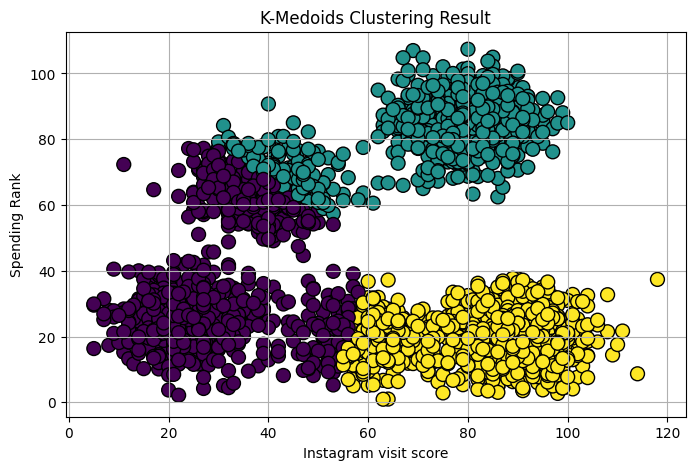

   User ID  Instagram visit score  Spending_rank(0 to 100)  Cluster
0        0                     63                24.050708        2
1        1                     61                25.223290        2
2        2                    104                18.528245        2
3        3                     82                86.890232        1
4        4                     14                31.492397        0


In [8]:
# ---------- Step 1: Load data using pandas ----------
def load_data(file_path):
    df = pd.read_csv(file_path)
    data = df.iloc[:, 1:3].values.tolist()  # Use columns 1 and 2 (ignore ID)
    return df, data

# ---------- Step 2: Define helper functions ----------
def euclidean_distance(p1, p2):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(p1, p2)))

def total_cost(cluster, medoid):
    return sum(euclidean_distance(point, medoid) for point in cluster)

# ---------- Step 3: K-Medoids algorithm ----------
def k_medoids(data, k, max_iter=100):
    medoids = random.sample(data, k)

    for _ in range(max_iter):
        clusters = [[] for _ in range(k)]
        labels = []
        for point in data:
            distances = [euclidean_distance(point, medoid) for medoid in medoids]
            nearest_idx = distances.index(min(distances))
            clusters[nearest_idx].append(point)
            labels.append(nearest_idx)

        new_medoids = []
        for cluster in clusters:
            if not cluster:
                new_medoids.append(random.choice(data))
                continue
            min_cost = float('inf')
            best_medoid = cluster[0]
            for candidate in cluster:
                cost = total_cost(cluster, candidate)
                if cost < min_cost:
                    min_cost = cost
                    best_medoid = candidate
            new_medoids.append(best_medoid)

        if new_medoids == medoids:
            break
        medoids = new_medoids

    return medoids, clusters, labels

# ---------- Step 4: Run ----------
file_path = r"C:/Users/durgarao/OneDrive/Desktop/data science in machine learning/Instagram visits clustering.csv"
df, data_points = load_data(file_path)

k = 3
medoids, clusters, labels = k_medoids(data_points, k)

# Add cluster labels to original DataFrame
df['Cluster'] = labels

# ---------- Step 5: Plot ----------
plt.figure(figsize=(8, 5))
plt.scatter(df['Instagram visit score'], df['Spending_rank(0 to 100)'],
            c=df['Cluster'], cmap='viridis', s=100, edgecolor='k')
plt.title("K-Medoids Clustering Result")
plt.xlabel("Instagram visit score")
plt.ylabel("Spending Rank")
plt.grid()
plt.show()

# Preview labeled data
print(df.head())

This plot shows the result of K-Medoids clustering applied to Instagram usage and spending data. The x-axis represents the Instagram visit score, and the y-axis represents the spending rank (0 to 100). The data points are grouped into three distinct clusters, each marked in a different color:

🟢 Cluster 0 (Teal): Users with low Instagram usage and low to moderate spending.

🟣 Cluster 1 (Purple): Users with high Instagram usage but generally low spending.

🟡 Cluster 2 (Yellow): Users with high spending and moderate to high Instagram activity.

K-Medoids is used here to create stable clusters based on real data points, making the analysis more robust against outliers.

# Agglomerative Clustering

Agglomerative clustering is a type of hierarchical clustering technique used in unsupervised machine learning. It is a bottom-up approach, meaning that each data point starts in its own individual cluster, and pairs of clusters are merged as one moves up the hierarchy.

🔍 Working Principle of Agglomerative Clustering

Start with each data point as its own cluster. So, for n data points, you have n clusters.

Compute the pairwise distance (or dissimilarity) between all clusters.

Euclidean distance (most common)

Manhattan distance

Cosine similarity

Find the two closest clusters based on a linkage criterion and merge them into a single cluster.

Recompute the distance between the new cluster and all the remaining clusters using a linkage method.

Steps 3 and 4 are repeated until:

All data points belong to a single cluster, or

A predefined number of clusters is reached.

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data=pd.read_csv(r"C:\Users\durgarao\OneDrive\Desktop\data science in machine learning/Instagram visits clustering.csv")
data=data.drop('User ID',axis=1)
data.head()

,Instagram visit score,Spending_rank(0 to 100)
0,63,24.050708
1,61,25.223290
2,104,18.528245
3,82,86.890232
4,14,31.492397


In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [12]:
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  # You can change linkage
data['Cluster'] = model.fit_predict(scaled_data)

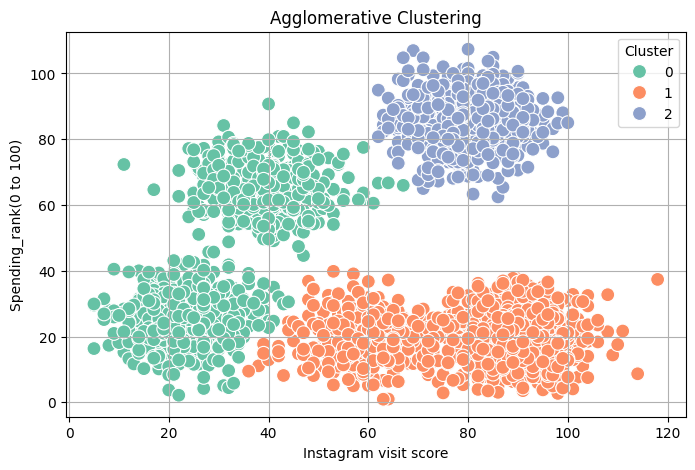

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=data['Instagram visit score'],
    y=data['Spending_rank(0 to 100)'],
    hue=data['Cluster'],
    palette='Set2',
    s=100
)
plt.title("Agglomerative Clustering")
plt.grid(True)
plt.show()

This plot shows the result of Agglomerative Clustering, a type of hierarchical clustering, applied to user data based on Instagram visit score (x-axis) and Spending rank (0 to 100) (y-axis).

The data is grouped into three clusters:

🟢 Cluster 0 (Green): Users with low Instagram activity and low to moderate spending rank.

🟠 Cluster 1 (Orange): Users with moderate to high Instagram usage but lower spending.

🔵 Cluster 2 (Blue): Users with high Instagram usage and high spending ranks — likely the most engaged and influential users.

Agglomerative clustering starts by treating each data point as its own cluster and then merges the closest clusters step-by-step, forming meaningful groups based on similarity. This method is useful for discovering nested patterns in data.

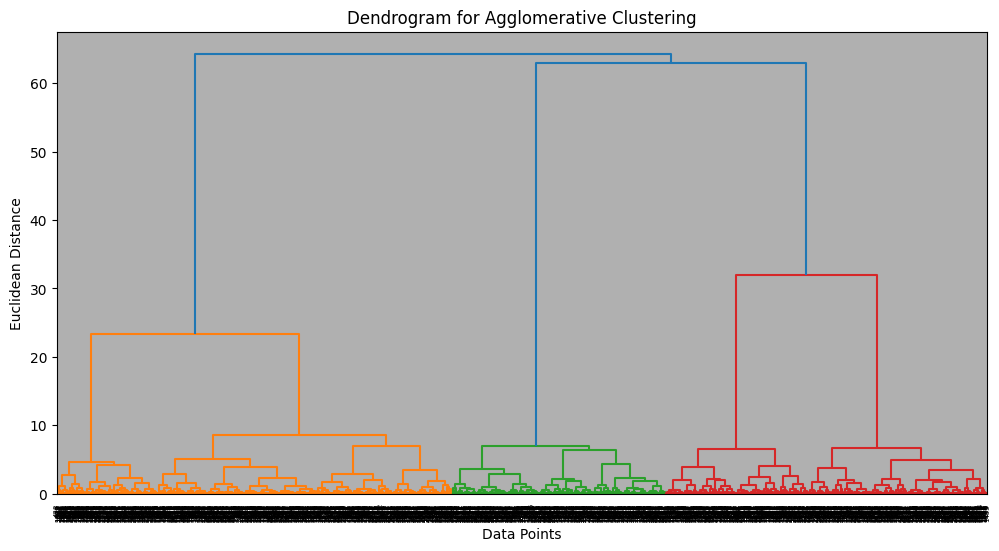

In [14]:
linked = linkage(scaled_data, method='ward')  # 'ward' is commonly used
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()

This plot shows a dendrogram used in Agglomerative Hierarchical Clustering. A dendrogram is a tree-like diagram that displays how data points are merged step by step.

The x-axis represents the individual data points.

The y-axis represents the Euclidean distance (or dissimilarity) between clusters at the time of merging.

Each merge is represented by a horizontal line. The height of the line shows how similar or different the merged clusters are — lower lines indicate more similar clusters.

The dendrogram helps determine the optimal number of clusters by finding the largest vertical distance (gap) between two horizontal lines that isn’t crossed by another horizontal line (also known as the “elbow” in the dendrogram).

In this case, the structure suggests that 3 clusters may be appropriate based on the height and grouping.

This visualization is essential in understanding the natural groupings in your data before finalizing the number of clusters.

# Agglomerative Hierarchical Clustering Using Single Linkage

Agglomerative hierarchical clustering using single linkage is a bottom-up clustering technique where:

Each data point starts as its own cluster
Clusters are merged based on the shortest distance between any two points in different clusters — this is known as single linkage
# 📌 How It Works — Step by Step

1.Initialization:

Start with each data point as its own cluster.

For n data points, you begin with n clusters.


2.Compute Distance Matrix:

Calculate the pairwise Manhattan, Euclidean, or other distances between all data points.

3.Single Linkage Criterion:

To determine the distance between two clusters, find the smallest distance between any pair of points, one from each cluster:

D(A,B)=min{dist(a,b) ∣ a∈A,b∈B}

This is why it's called single linkage: it links the closest pair of points.

4.Merge Closest Clusters:

Merge the two clusters that have the smallest single linkage distance.

5.Update Distance Matrix:

After merging, recompute distances between the new cluster and all other existing clusters using single linkage.

6.Repeat:

Continue merging the two closest clusters until:

Only one cluster remains (full hierarchy), or

You reach a desired number of clusters.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

In [16]:
data=pd.read_csv(r"C:\Users\durgarao\OneDrive\Desktop\data science in machine learning/Instagram visits clustering.csv")
data=data.drop('User ID',axis=1)
linked_single=linkage(data,method='single')

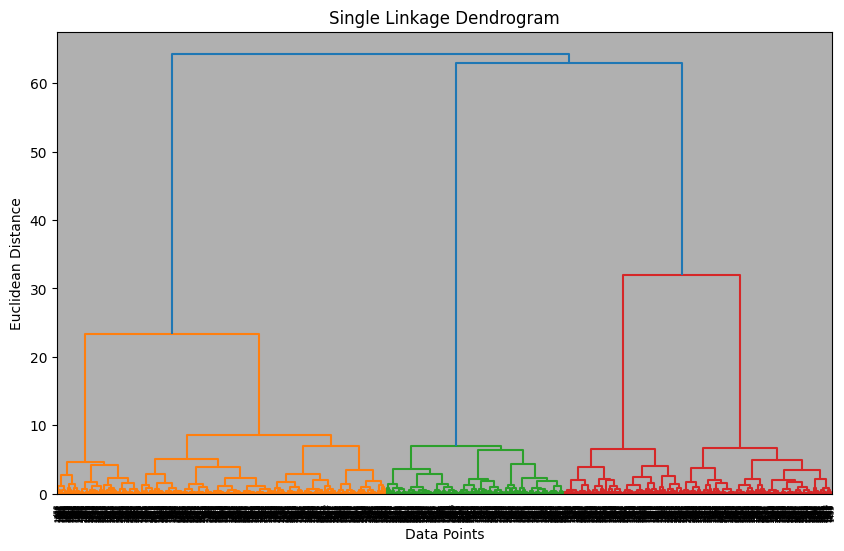

In [17]:
plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title("Single Linkage Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()

This plot describes a Single Linkage Dendrogram used in Hierarchical Clustering


The x-axis represents individual data points.

The y-axis shows the Euclidean distance at which clusters are merged.

The method used here is Single Linkage, meaning the distance between clusters is defined as the shortest distance between any single point in one cluster to any point in another cluster.

Clusters are merged based on the minimum distance between points.

The dendrogram helps identify the optimal number of clusters by observing where the largest vertical jumps occur between merged clusters. In this case, clear separations suggest multiple possible cluster counts depending on the cut-off threshold.

This kind of dendrogram is useful when you want to detect elongated or chained clusters.

In [18]:
clusters_single = fcluster(linked_single, t=2, criterion='maxclust')
print("Sinlge Linkage Clusters:", clusters_single)

Sinlge Linkage Clusters: [1 1 1 ... 1 1 1]


In [19]:
clusters_single

array([1, 1, 1, ..., 1, 1, 1], shape=(2600,), dtype=int32)

# Agglomerative Hierarchical Clustering Using a Complete Linkage

Agglomerative Hierarchical Clustering using Complete Linkage is a type of hierarchical clustering method that builds a hierarchy of clusters in a bottom-up fashion. Let's break it down:

# 🧩 What is Agglomerative Hierarchical Clustering?


Agglomerative means that the algorithm starts with each data point as its own cluster.

It then merges the closest pair of clusters step by step until all points belong to a single cluster (or until a desired number of clusters is reached).

The result is a dendrogram—a tree-like diagram that shows how clusters are merged.

# 🔗 What is Complete Linkage?
Complete linkage is one of the ways to measure the distance between clusters. In this method, the distance between two clusters is defined as:
The maximum distance between any two points in the two different clusters.

D(A,B)=max{d(a,b)∣a∈A,b∈B}

# ⚙️ Working Rule (Algorithm Steps)
Start with all data points as individual clusters (i.e., if there are 𝑛 data points, you have n clusters).

Compute the pairwise distances between all clusters using the complete linkage method.

Merge the two clusters that have the smallest maximum distance (i.e., most similar under complete linkage).

Update the distance matrix to reflect the new distances between the newly formed cluster and all other clusters.

Repeat steps 2–4 until only one cluster remains or a stopping condition (like a number of desired clusters) is met.

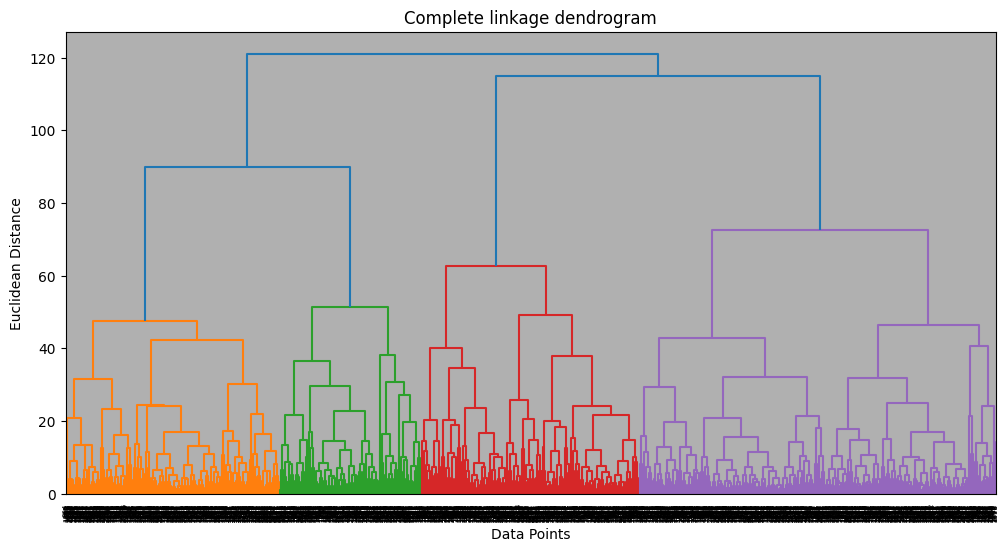

In [20]:
data = pd.read_csv(r"C:\Users\durgarao\OneDrive\Desktop\data science in machine learning/Instagram visits clustering.csv")  # Replace with your actual file path
data = data.drop("User ID", axis=1)
# Perform Complete Linkage Clustering
linked_complete = linkage(data, method='complete')

linked = linked_complete
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title("Complete linkage dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()

This plot shows a Complete Linkage Dendrogram, which is a part of Hierarchical Clustering.

The x-axis represents the data points being clustered.

The y-axis indicates the Euclidean distance at which clusters are merged.

The complete linkage method measures the maximum distance between elements of two clusters. That is, it considers the farthest points between clusters for merging decisions.

This approach results in compact, spherical clusters and avoids chaining effects seen in single linkage.

The dendrogram helps visualize how the clusters are formed step-by-step and assists in selecting the optimal number of clusters by identifying large vertical jumps in the linkage lines.

This type of dendrogram is suitable when you want well-separated and tight clusters.>/h5

In [21]:
clusters_complete = fcluster(linked_complete, t=2, criterion='maxclust')
print("Complete Linkage Clusters:", clusters_complete)

Complete Linkage Clusters: [2 2 2 ... 1 2 1]
